In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=33)

X_train, X_test, X_test = X_train / 255.0, X_test / 255.0, X_test / 255.0


In [3]:

model = tf.keras.models.Sequential([
    # features extraction
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, (5, 5), activation="relu"),

     tf.keras.layers.Flatten(),

    # Network Layers
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")
])

In [4]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [5]:
model_output = model.fit(X_train, Y_train, epochs=15)


Epoch 1/15
1407/1407 [==============================] - 32s 22ms/step - loss: 1.4726 - accuracy: 0.4602
Epoch 2/15
1407/1407 [==============================] - 29s 21ms/step - loss: 1.1074 - accuracy: 0.6078
Epoch 3/15
1407/1407 [==============================] - 26s 18ms/step - loss: 0.9583 - accuracy: 0.6624
Epoch 4/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.8666 - accuracy: 0.6969
Epoch 5/15
1407/1407 [==============================] - 31s 22ms/step - loss: 0.7938 - accuracy: 0.7243
Epoch 6/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7396 - accuracy: 0.7421
Epoch 7/15
1407/1407 [==============================] - 32s 22ms/step - loss: 0.6871 - accuracy: 0.7594
Epoch 8/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.6430 - accuracy: 0.7751
Epoch 9/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.6038 - accuracy: 0.7882
Epoch 10/15
1407/1407 [==============================] - 29s 21m

In [6]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 6ms/step - loss: 1.0570 - accuracy: 0.7098


[1.0570427179336548, 0.7098000049591064]

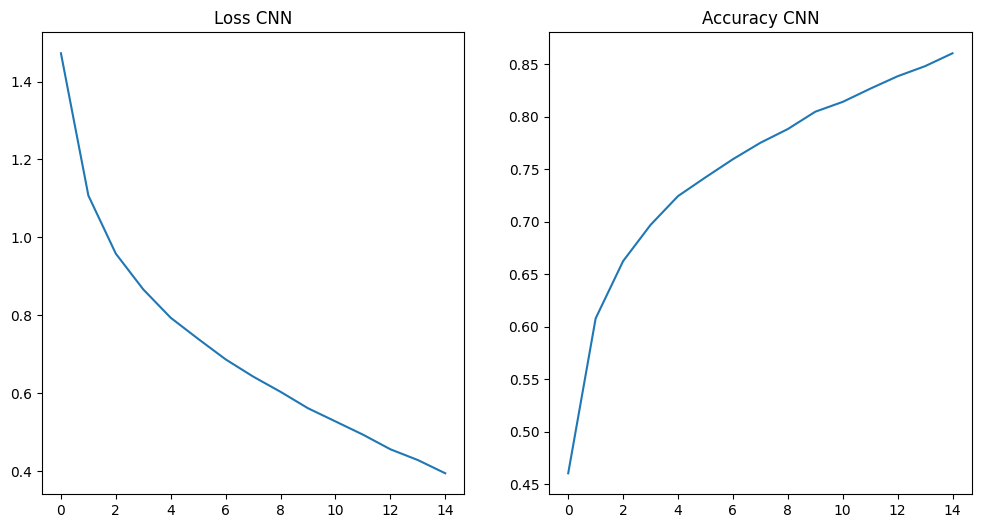

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()